In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("dataset (1).csv")

In [3]:
df.head()

,Well_id,Reservoir Pressure,ISIP,Closure Pressure,PAD Volume,Fluid Efficiency,Transmissibility,Total Prop Mass,Max Prop Conc
0,0,1250.50,2129.5,1861.0,4.892,0.149,12.685,16787.317,7.0
1,2,946.75,2850.5,2413.5,5.005,0.240,10.236,14543.000,5.0
2,3,1515.00,3782.5,3054.5,4.995,0.100,10.667,14366.000,5.0
3,4,2390.55,3449.5,3048.0,4.457,0.040,10.765,15406.000,5.0
4,8,655.95,NaN,2290.0,3.563,0.080,12.254,15504.917,7.0


In [4]:
df.describe()

,Well_id,Reservoir Pressure,ISIP,Closure Pressure,PAD Volume,Fluid Efficiency,Transmissibility,Total Prop Mass,Max Prop Conc
count,48.000000,48.000000,45.000000,46.000000,48.000000,48.000000,48.000000,43.000000,48.000000
mean,31.041667,1275.932292,3271.511111,2526.130435,4.198271,0.205812,11.398646,15621.992256,6.591667
std,17.526828,588.245674,914.087421,667.773585,0.954574,0.168566,1.333656,5745.320548,1.994443
min,0.000000,106.150000,1837.000000,755.500000,1.598000,0.010000,10.021000,344.583000,2.000000
25%,16.750000,935.175000,2530.500000,2086.000000,3.563000,0.090000,10.350750,12424.258500,5.000000
50%,31.500000,1284.325000,3062.000000,2473.250000,4.429000,0.155000,11.005000,15027.517000,6.000000
75%,45.250000,1631.850000,3900.000000,3033.250000,4.693750,0.260000,12.113750,18505.750000,8.000000
max,60.000000,2653.950000,5345.000000,4089.000000,6.235000,0.770000,15.648000,26874.000000,10.000000


In [5]:
# Определяем колонки с пропущенными значениеями и количество пропусков
missed_data_columns = {column_name: df[column_name].isnull().sum() for column_name in df if df[column_name].isnull().sum()}
missed_data_columns

{'ISIP': 3, 'Closure Pressure': 2, 'Total Prop Mass': 5}

array([[<AxesSubplot:title={'center':'Well_id'}>,
        <AxesSubplot:title={'center':'Reservoir Pressure'}>,
        <AxesSubplot:title={'center':'ISIP'}>],
       [<AxesSubplot:title={'center':'Closure Pressure'}>,
        <AxesSubplot:title={'center':'PAD Volume'}>,
        <AxesSubplot:title={'center':'Fluid Efficiency'}>],
       [<AxesSubplot:title={'center':'Transmissibility'}>,
        <AxesSubplot:title={'center':'Total Prop Mass'}>,
        <AxesSubplot:title={'center':'Max Prop Conc'}>]], dtype=object)

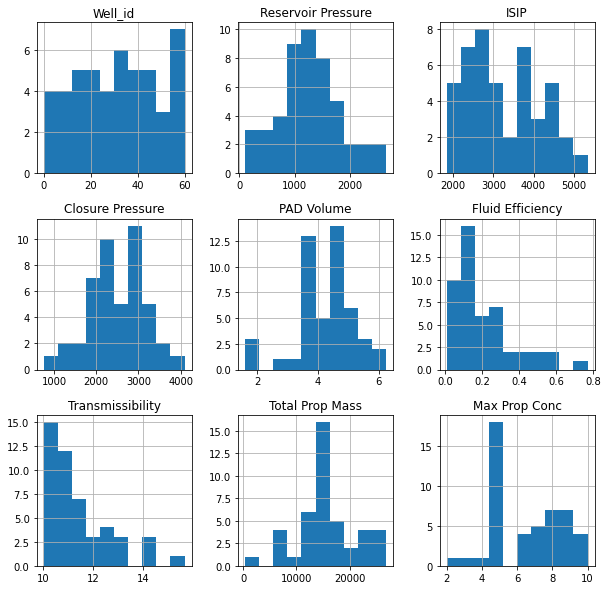

In [6]:
df.hist(figsize=(10, 10))

,Well_id,Reservoir Pressure,ISIP,Closure Pressure,PAD Volume,Fluid Efficiency,Transmissibility,Total Prop Mass,Max Prop Conc
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,31.041667,1275.932292,3258.416667,2523.927083,4.198271,0.205812,11.398646,15560.067750,6.591667
std,17.526828,588.245674,885.917125,653.498439,0.954574,0.168566,1.333656,5434.227001,1.994443
min,0.000000,106.150000,1837.000000,755.500000,1.598000,0.010000,10.021000,344.583000,2.000000
25%,16.750000,935.175000,2543.625000,2088.000000,3.563000,0.090000,10.350750,13397.791500,5.000000
50%,31.500000,1284.325000,3062.000000,2473.250000,4.429000,0.155000,11.005000,15027.517000,6.000000
75%,45.250000,1631.850000,3893.250000,3003.750000,4.693750,0.260000,12.113750,17468.083250,8.000000
max,60.000000,2653.950000,5345.000000,4089.000000,6.235000,0.770000,15.648000,26874.000000,10.000000


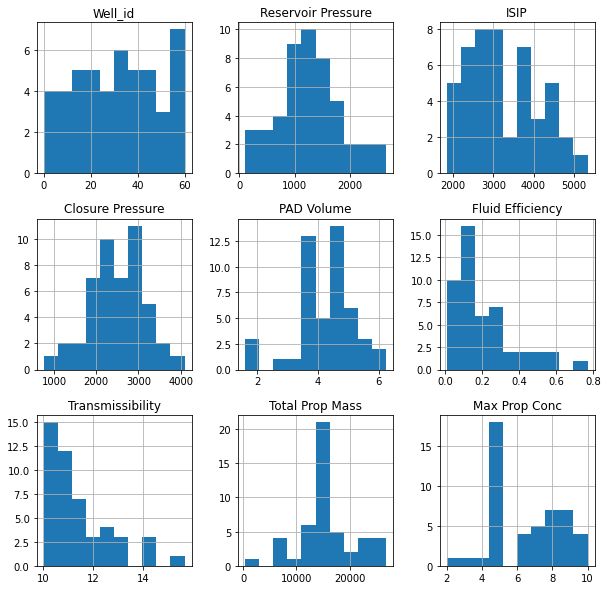

In [7]:
# Анализируем возможные способы заполнения пропущенных данных
# median
df_median = df.fillna(df.median())
df_median.hist(figsize=(10, 10))
df_median.describe()

,Well_id,Reservoir Pressure,ISIP,Closure Pressure,PAD Volume,Fluid Efficiency,Transmissibility,Total Prop Mass,Max Prop Conc
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,31.041667,1275.932292,3271.511111,2526.130435,4.198271,0.205812,11.398646,15621.992256,6.591667
std,17.526828,588.245674,884.433413,653.411184,0.954574,0.168566,1.333656,5431.127277,1.994443
min,0.000000,106.150000,1837.000000,755.500000,1.598000,0.010000,10.021000,344.583000,2.000000
25%,16.750000,935.175000,2543.625000,2088.000000,3.563000,0.090000,10.350750,13397.791500,5.000000
50%,31.500000,1284.325000,3215.750000,2512.565217,4.429000,0.155000,11.005000,15441.208500,6.000000
75%,45.250000,1631.850000,3893.250000,3003.750000,4.693750,0.260000,12.113750,17468.083250,8.000000
max,60.000000,2653.950000,5345.000000,4089.000000,6.235000,0.770000,15.648000,26874.000000,10.000000


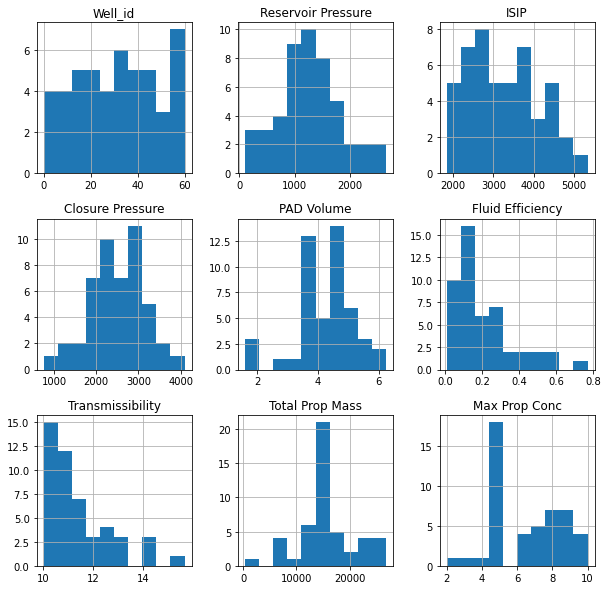

In [8]:
# mean
df_mean = df.fillna(df.mean())
df_mean.hist(figsize=(10, 10))
df_mean.describe()

,Well_id,Reservoir Pressure,ISIP,Closure Pressure,PAD Volume,Fluid Efficiency,Transmissibility,Total Prop Mass,Max Prop Conc
count,48.000000,48.000000,47.000000,48.000000,48.000000,48.000000,48.000000,47.000000,48.000000
mean,31.041667,1275.932292,3291.329787,2539.552083,4.198271,0.205812,11.398646,16138.250000,6.591667
std,17.526828,588.245674,959.501010,656.664308,0.954574,0.168566,1.333656,5891.348367,1.994443
min,0.000000,106.150000,1837.000000,755.500000,1.598000,0.010000,10.021000,344.583000,2.000000
25%,16.750000,935.175000,2522.500000,2088.000000,3.563000,0.090000,10.350750,13131.000000,5.000000
50%,31.500000,1284.325000,3062.000000,2567.250000,4.429000,0.155000,11.005000,15183.333000,6.000000
75%,45.250000,1631.850000,3944.250000,3003.750000,4.693750,0.260000,12.113750,21065.333000,8.000000
max,60.000000,2653.950000,5345.000000,4089.000000,6.235000,0.770000,15.648000,26874.000000,10.000000


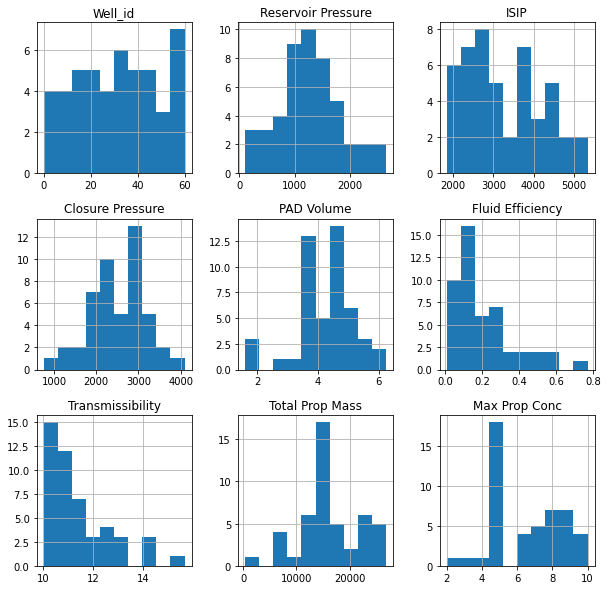

In [9]:
# mode
df_mode = df.fillna(df.mode())
df_mode.hist(figsize=(10, 10))
df_mode.describe()

In [10]:
# выбираем в качестве способа заполнения пропусков - среднее арифметическое
df = df.fillna(df.mean())

In [11]:
df.head()

,Well_id,Reservoir Pressure,ISIP,Closure Pressure,PAD Volume,Fluid Efficiency,Transmissibility,Total Prop Mass,Max Prop Conc
0,0,1250.50,2129.500000,1861.0,4.892,0.149,12.685,16787.317,7.0
1,2,946.75,2850.500000,2413.5,5.005,0.240,10.236,14543.000,5.0
2,3,1515.00,3782.500000,3054.5,4.995,0.100,10.667,14366.000,5.0
3,4,2390.55,3449.500000,3048.0,4.457,0.040,10.765,15406.000,5.0
4,8,655.95,3271.511111,2290.0,3.563,0.080,12.254,15504.917,7.0


In [12]:
# Проверка гипотезы о положительной корреляции между давлением в резервуаре и общей массы проппанта
x = df["Reservoir Pressure"]
y = df["Total Prop Mass"]

<AxesSubplot:>

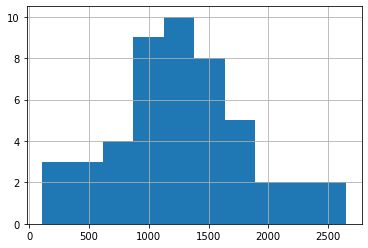

In [13]:
x.hist()

<AxesSubplot:>

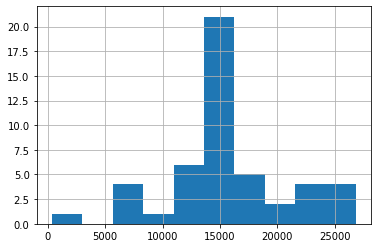

In [14]:
y.hist()

In [15]:
# Распределения переменных унимодально, без выбросов и близко к нормальному, что позволяет произвести расчет коэффциенте Пирсона 
# для проверки взаимосвязи между ними

Text(0, 0.5, 'Total Prop Mass')

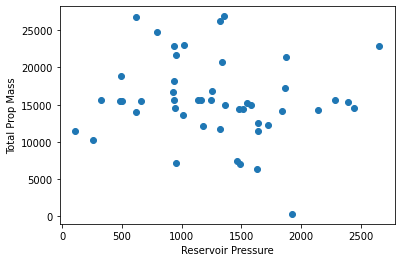

In [16]:
plt.scatter(x, y)
plt.xlabel("Reservoir Pressure")
plt.ylabel("Total Prop Mass")

In [17]:
pirson_coeff = x.corr(y)
pirson_coeff

-0.10245334570356772

In [18]:
# Коэффиент Пирсона близок к нулю и более того он отрицательный, что позволяет сделать вывод о том, 
# что гипотеза о положительной корреляции между давлением в резервуаре и общей массой проппанта неверна

<AxesSubplot:>

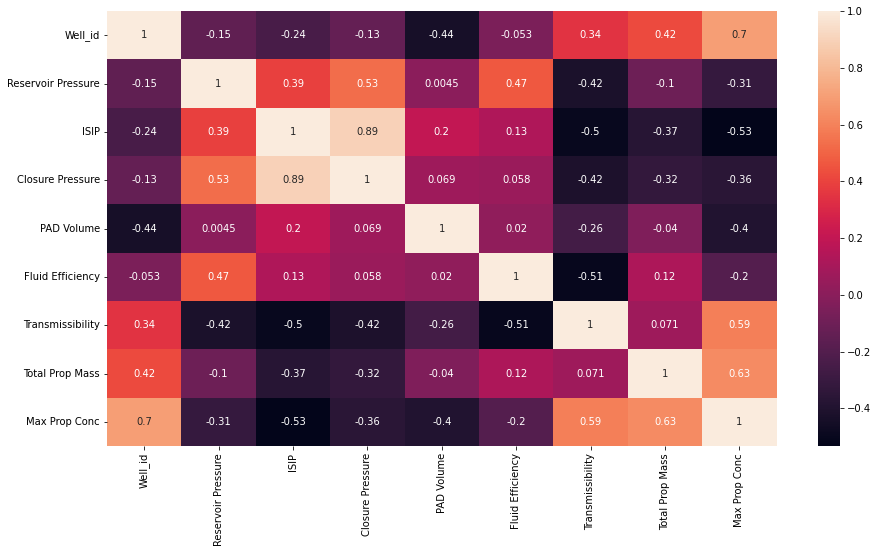

In [19]:
# Поиск других корреляций
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, fmt=".2g")

In [20]:
# Видна сильная положительная корреляция между Closure Pressure и ISIP. Гипотеза: Чем больше ISIP, тем больше Closure Pressure

In [25]:
# Для оценки массы проппанта попробуем установить связь концентрации проппанта и его общей массой
X = df["Max Prop Conc"]
Y = df["Total Prop Mass"]

count    48.000000
mean      6.591667
std       1.994443
min       2.000000
25%       5.000000
50%       6.000000
75%       8.000000
max      10.000000
Name: Max Prop Conc, dtype: float64

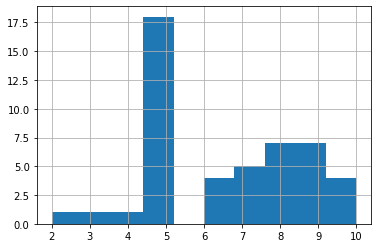

In [26]:
X.hist()
X.describe()

<AxesSubplot:>

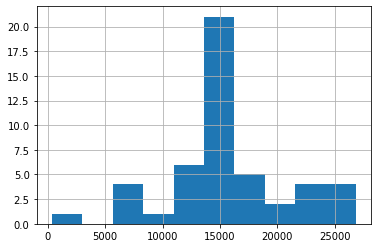

In [27]:
Y.hist()

In [28]:
# Распределения величин близки к нормальном, унимодальны и без явных выбросов
X.corr(Y)

0.6305979018051141

In [29]:
# Разбиение наших данных на тренировочную и тестовую выборки
X = np.array(X).reshape((-1, 1))
Y = np.array(Y)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [30]:
model = LinearRegression().fit(X_train, Y_train)
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([1870.87265376]),
 '_residues': 586499464.9879984,
 'rank_': 1,
 'singular_': array([11.79639776]),
 'intercept_': 3369.438577900417}

In [31]:
r_sq = model.score(X_train, Y_train)
slope = model.coef_
intercept = model.intercept_

In [32]:
print('coefficient of determination:', r_sq)
print('slope:', slope[0])
print('intercept:', intercept)

coefficient of determination: 0.4536897675659993
slope: 1870.872653764457
intercept: 3369.438577900417


In [33]:
# Прогноз
Y_predicted = model.predict(X_test)

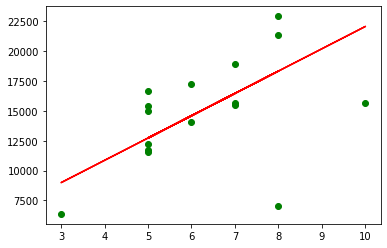

In [34]:
# Визуализация полученных результатов
plt.scatter(X_test, Y_test, color="green")
plt.plot(X_test, Y_predicted, color="red")

In [35]:
# Оценка точности модели
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predicted)))

Mean Absolute Error: 2945.935343084151
Mean Squared Error: 15830753.928649878
Root Mean Squared Error: 3978.7879974497105
